In [13]:
import pandas as pd

data_dir = "results/motif_regression_output/macs2/"
peak_df = pd.read_csv(data_dir + "pbmc_peaks.narrowPeak", sep = "\t", 
                      header=None, names=['chrm', 'start', 'end', 'peak_name', 
                                          'int score', '_', 'fold_change', 
                                          'pvalue', 'qvalue', 'summit_loc'])
peak_df = peak_df[peak_df['chrm'].str.contains('chr([0-9][0-9]?)|(x)', case=False)]
peak_df['length'] = peak_df.apply(lambda x: x['end']-x['start']+1, axis=1)

prev_start = 0
prev_end = 0
res = []
for i in range(peak_df.shape[0]):
    cur_start = peak_df.iloc[i]['start']
    cur_end = peak_df.iloc[i]['end']
    if cur_start == prev_start and prev_end == prev_end:
        res.append(False)
    else:
        res.append(True)
    prev_start = cur_start 
    prev_end = cur_end
peak_df = peak_df[res]   

peak_df[['chrm', 'start', 'end', 'length']].to_csv('results/motif_regression_output/MACS2_peaks.bed', 
                                                   header=None, sep='\t', index=False)

peak_df.shape[0]

/tmp/ipykernel_32430/3149375562.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  peak_df = peak_df[peak_df['chrm'].str.contains('chr([0-9][0-9]?)|(x)', case=False)]


117366

In [16]:
peak_df['chrm'].value_counts()

chr1     11365
chr2      9431
chr3      7440
chr6      7255
chr12     6098
chr17     6061
chr5      5832
chr7      5767
chr11     5734
chr10     5533
chr19     4940
chr8      4875
chr9      4774
chr4      4709
chr16     4119
chr14     3998
chr15     3854
chr20     3338
chrX      3194
chr13     2681
chr22     2584
chr18     2289
chr21     1495
Name: chrm, dtype: int64

In [17]:
!head results/motif_regression_output/MACS2_peaks.bed

chr1	10016	10245	230
chr1	180707	180967	261
chr1	181336	181550	215
chr1	191363	191898	536
chr1	267886	268075	190
chr1	271199	271359	161
chr1	586095	586260	166
chr1	629833	630004	172
chr1	633910	634095	186
chr1	778296	779130	835


In [18]:
!wc -l results/motif_regression_output/MACS2_peaks.bed

117366 results/motif_regression_output/MACS2_peaks.bed


<AxesSubplot:>

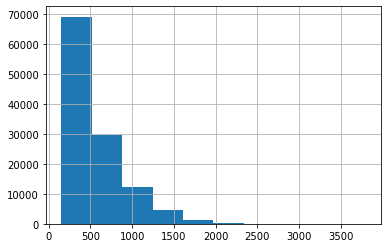

In [19]:
peak_df['length'].hist()